## Introduction

In this notebook, using the unified CSV data that we had generated earlier, we would try to answer some question to further understand the trends of Credit Default Swap Filings

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycountry
import glob
import csv
import re
import os
import string

## Data Preprocessing

In [19]:
unified_csv = pd.read_csv("../UnifiedCSV/final_csv.csv", dtype=object)

In [20]:
#Replace all unformatted NaN values to standardized NaN
unified_csv['Notional Amount'] = unified_csv['Notional Amount'].str.replace('[^\w\s]','')
unified_csv['Notional Amount'] = unified_csv['Notional Amount'].str.replace('[^\d]','')
unified_csv['Reporting Year'] =  '20' + unified_csv['Reporting Year']
unified_csv['Appreciation/Depreciation'] = unified_csv['Appreciation/Depreciation'].str.replace('[^\w\s]','')
unified_csv['Upfront Payments Paid/Received'] = unified_csv['Upfront Payments Paid/Received'].str.replace('[^\w\s]','')

In [21]:
unified_csv

,CIK,Reporting Type,Reporting Year,Counterparty,Notional Amount,Reference Entity/Obligation,Expiration Date,Appreciation/Depreciation,Upfront Payments Paid/Received,Buy/Sell Protection,Description
0,0000315774,N-CSR,2017,Barclays,10000000,"Eastman Chemical Co, 7.60%, 02/01/27",12/20/21,NaN,35394,NaN,NaN
1,0000315774,N-CSR,2017,Barclays,5000000,"Host Hotels & Resorts, 4.75%, 03/01/23",12/20/21,NaN,50649,NaN,NaN
2,0000315774,N-CSR,2017,Barclays,10000000,"Macy's Retail Holdings, 7.45%, 07/15/17",12/20/21,NaN,507117,NaN,NaN
3,0000315774,N-CSR,2017,BNP Paribas,10000000,"Host Hotels & Resorts, 4.75%, 03/01/23",06/20/22,NaN,24159,NaN,NaN
4,0000315774,N-CSR,2017,BNP Paribas,5000000,"International Paper Co, 7.50%, 08/15/21",12/20/21,NaN,49431,NaN,NaN
5,0000315774,N-CSR,2017,BNP Paribas,5000000,"Marriott International, Inc., 3.00%, 03/01/19",12/20/21,NaN,88168,NaN,NaN
6,0000315774,N-CSR,2017,BNP Paribas,10000000,"Ryder Systems Inc, 2.55%, 06/01/19",12/20/21,NaN,22277,NaN,NaN
7,0000315774,N-CSR,2017,Goldman Sachs,5000000,"Host Hotels & Resorts, 4.75%, 03/01/23",12/20/21,NaN,28750,NaN,NaN
8,0000315774,N-CSR,2017,Goldman Sachs,5000000,"Nordstrom Inc, 6.95%, 03/15/28",06/20/22,NaN,156817,NaN,NaN
9,0000315774,N-CSR,2017,Goldman Sachs,10000000,"Ryder Systems Inc, 2.55%, 06/01/19",06/20/22,NaN,92399,NaN,NaN


## Analysis

### Question 1

First let's try to analyse the reporting of the CDS information and see how exactly were these CDS reported and more importantly their trend during the Financial Crisis in 2008

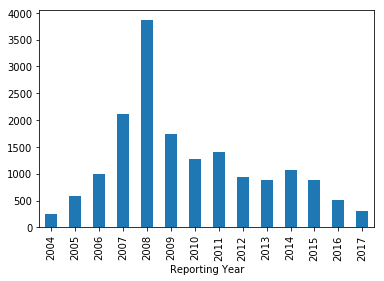

In [22]:
unified_csv.groupby('Reporting Year').size().plot(kind='bar')

As expected, we see that events leading up to the global financial crisis allows us to understand that CDS usage had increased incremently. At the brink of 2008, the usage was at its peak with almost 4000 CDS mentions.

### Question 2 

Let's check and see who are the big players head the most credit default swaps from 2004-2017

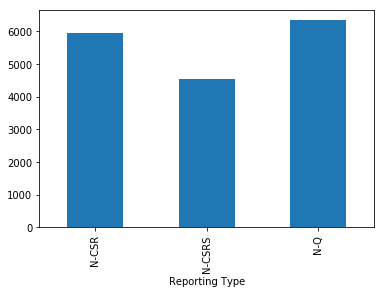

In [23]:
unified_csv.groupby('Reporting Type').size().plot(kind='bar')

In [26]:
def longestSubstringFinder(string1, string2):
    answer = ""
    len1, len2 = len(string1), len(string2)
    for i in range(len1):
        match = ""
        for j in range(len2):
            if (i + j < len1 and string1[i + j] == string2[j]):
                match += string2[j]
            else:
                if (len(match) > len(answer)): answer = match
                match = ""
    return answer

for country in pycountry.countries:
    for item in unified_csv['Reference Entity/Obligation']:
        print(longestSubstringFinder(country.name, str(item)))

a

a


a




a

a






























































































a
a
a
a









u


u




























a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a









u








a
a












a




a

A
A
A
A
A









a
b




r
a

a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a




























a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a











a







a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
u




a

a




a
a
a
a
a
a








a
a
a
a
a
r
a
a
a
a



a




















































a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a




a
a
a



a

a

a
a
a




a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a



u

a





a








a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a

a
a






a







a





a













a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a

a
a
a
a
a
a
a
a
a
a
a
a












a
a
a
a
a
a
a
a
a
a
a
a
a
a



a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


a






ub



a



a




ub
a








a
a


a
a




a


A

r
r
r
r
u
b


u

u



a
r

u

Ar

a
A
r
r
r
A
A

u
r
r








u

u
a
a

r
r

r
r

u
r


u

r
u
r

u

r
u
u
u
u
u

u
u
r
u



r
a

u

u
u












A

u


u








a
a
a
a




a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a

A
A
A





























r
r
a
a
a












a




r


u



ub

a


a
a
a




a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a












a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a



u
a



Ar

r




a


r
r


a
a



a

a
A





































a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a

a

Ar
a
a
A
A
A
a
a

r
a




a
a

a
A
A
a
a

a
a































































a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a



u




a







u





u















a
a
a
a
a
a
a
a

a
a



a
a

a
a
a



a



a


a
a


a
a
a

u



a
a
a
a
a
a
a
a
a
a




a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


a














a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
b
u

b


a
a
a
a
a









a

a




A
A
A





















A
A
A
A
a





















a










a
a

a




a

a
a
a
a


a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a




a







A
A
A
A
a
a





r
a
a


a



u


u
a
a
a








r
a
a
a
a
a


u


u









a
a
a
A
A

































a

a












a











A



A
Ar




a
a















a






















t
t
n
t
n
n
st
st
st
t

n
g
t
n
g
t
n
t
s

A
A
A
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
A
A
A
n
n
n
n
n
n
n
n
n
n
n
n
n




an









an
an
an
an
an
an
an
a
a
a
a




















n
n
n
n
n
a
n
t
a
a
n
A
an
ha
n
t
a
a
A
i
an
ha
st
n
t
a
a
A
an
ha
i
st
n
n
n
n
n
n
n
n
n
n

an
st






an
st





st





st






n
n
n
n
n
s
s
an
tan
tan





n
n
a
a
i
i

a
n

an
a
a












n
n
n
n
n
n
n
n
n
n
n
n
n
n

n
ni
n
t
h
a


n
n
n
n
A
n
st
i
ni
an
ni
an
a
ni
an
an
ni
A
an
A
sta
A
a
n
n
n
n
n
n
n
n
n
n
n
n
n
n
A
sta
A
n
n
st
a
n
n
n
st





st





an
an
n
t
t
t
i
n
t
h
i

n
n


h

n
i
n
i
i
i
s
an
an
an
an
an
an
an











i
i
i
s
an
an
an
an
an
an
an











a
an
an
an




an
an
ni
an
an
an
an
an
an
n
n
t
n
t
i
i
i
i
i

tan
st
a
i
ta
t

ta

a
ha
an
n
n
n
s
s
an
s
s
an
s
s
an
n
n
n
n





an
an
an
an
an
n
n
n
n






an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
i
i
i
i
i
i
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an
an

n
n
n
an
an
n
n
n

an

i
an
i
an
n
n
an
an
n
an
an
an
an
an
n
an
an
n
n
n
n
n
n
n
n
n
n
n
n
n

n
n
n
n
n
n
n
n
n
n
n
t
t

t





n
n
n
n
n
n
i
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
a
i
a
t
n
n
s
a
n
a
a
st
t



an
n
n
h
h
h
h
a
an
ta

n
i
an
i
i
an
i
an
an
an
an
an
an
an


i
an
an
an
an
i
i
an
an
an
an
an
an
an



n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
t
i
i
i
i
i
i
i
i
i
i
n
n
t
t
t
t
t
t
st
t
st
st

n
n
n
n
n
n
n
n
n
n
n
n
n
n
n



n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
t
ni
a
a
a
n
n


h
i
i
n
n
i
i
ni
a
a
a
n
n
h
a


i
i
n



ta
ta
n
n
a
a

n
n

ta
an
n
A
an
an
an
an
an
i
a






t
n
ta
an
t
i
n
A
st
a
A
i
an
an
A
A
st
i
an
an

n
t
t
t
t
t
t
i
t
i
n
a
a
an
an
n
an
an
n
i
an
n
i
i
t
an
a
an
t
a
n
a

a
s
A
st
i
ha
st
a
t
t
a
a
a
n
s
A
ha
a
t
t
a
a
a
s
A
ha
i
a

an
an
n
n
n







t
t

t
t
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
t
h
t
t
n
i
t
t
h
t
n
tan
n
t
n
i
ni
an
i
an
an
an
an
an
an
an
n
A
n
n
a
n
n
n
n
ni
an
ni
an
an
an
an
an
ni
n
n
n
a
an
i
i
i
a
a




an
st










an
st





st





st












n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
i
i
i
i
i
i
i
n


n



t
n
n
n
n
n
n
n
a
t
i
i
i


a

a

an
n
t
t
s
a

a
st


i
a
a


ta
ta
ta
n
n
A
A
t
t
t
t
n
n
n
i
i
i
s
s
n
t
ta
ta
t






n
n
n
n
n
n
n
ta

n
n
n
n
n

a


ta
s
s
s
s
a
ta
n
a
i
i
ha
i
i
h
ta
n
i
i
i

a
a
a

a


a

a
a
a
a
n
n
n
n
t




n
n
n
n
n
n
n
n
n
n
n
n
n
i
s
n
n
an
a
i

ta

st

i
s
an
n
an
h
t
n
n
n
A
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n

n

ni
n

n










i
i
an
i
t
n
an
s
i
i
i
i
i
n
n










a






i
i
an
an
an
an
an
an
ni
a










n
i
ta
h
a
i
ta
t
ta
n
i


i
i

i

i
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n


ni
ni

ni
i
A
ni






n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
a
a
an
an




n
n
n
n
n
n
n
n
n
n
n
n
n






an
an
s
an

n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n



n
n
n
A
n
s
a
n
n
st
a

n
an
ni

t
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
ta
ta
ta
ta
i
a
a
i




n
n
n
n
n
n
n
n
n
n
n
n

n
st
st

a
a
a
an
an
an
n
a
an
an
an
a
n
n
an


an
an
t
s
is
is
is
is
is
is
is
a
a
a
a
n
i
an
an






ta
ta
ta
an
an
an
an
i
i
i
n
n
tan
tan
tan
n
n
n
n
n
n

ni
ni
ni
is
is
is
is
is
is
i
h
h
st
st
a
a
s
ta
a
a
a
a
a
a
A
A
A
A
A
A
A
st
st
an
an
an
an
an




n
a
a
a























n
s
s
a
a
a
a
a
a
a
a
a
a




n
n
n
n

n
n
n
ta
ta
a
a
a
a
a
a
a
t
t
t
t
t
t
t
t
t
t
n
A

a
a

stan
i

n
n
i
an
t

i
i
an

n

an
a

n
n
n
n

A
st

h













n
i
i
n
n
n
t
t
s
a

a
st


i
a
a


n



t
t
t
t
t
t
s
n
t
i
an
a
t
n
t
an
i
i
a
n
a
t
n







t
i

an

an
an
i
i
an
an
n
n
n
n
n
n
n
n
an
a








n




n
n
n
n
n
n


a

ol
ol

a


ol
ol


a


a


a






A



a
o
a
a

a
o
a
a



a
a

o
a
a

o
o

o
o
o
o
A

a
o

a
l

a

o

l
ng
















n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n


o
o
o
o
o


n
n
n
n
ol
ol
a
a
a
a
ol
o
a
a
a
o
l
o
o






o

o
l








n
n
n
n
n
n
n
n
n
n
a
a
n
n
n
n
n
n
n
n
n

la
la
la
o


n
n
n





a
a
a
a
a
a


n
n
n
n
n
n
n


l
l
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n


















o
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n

ol

a

a





a
ol
ol


a

ol
ol
ol
ol
ol
ol
a
a
ol


o
o
o
o
o
a


n





a
a

a
a
a
o
a
a
a





a
o



a
a

a
o
a
a
a
a
n
a


a
a



a
a
a
a
a
a
o
o
a
a







a
a
a
a
a
a
a
a

o
o
a
a
a
a
a


o
o
o



n
o
o
o
o
o
A

a
o


a
a
a
a
l

a
o
a
a
n
n
n
a
a
o
o
n
n
l
l
l
l


A
A
A
A
n
n
n
n
n
n
n
n
n
n
n










a
a
a
a
o
o
n
n
n
n
a




a



o
g
g
A

a
o

a
l

a

o

l
ng

a
l
o
l
o
o
a
a

a
o
o
o
a
a



a
a

o
a
a

n
n
n
n


n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
A
a
a


la
la
A
A

a
o
n
n
n
n
n
n
n
n
n
n
n
n
n
n


a

a







o
ol
a

o


a
o
o
o
o


a
a

a
a

a
a
a
a
a


o
o
o
o
a
a
l
l
o
o
o
o
a
a
l
l
l
l
l
l
ol
n
n
n
n






a









a


A
A
A
A
a
a
a
a
o
o



l





































o
o
a
a
a
a
a
a
a
a
a
a
a

a
a
a
a
a
o
o
o
o
a






o
o
o
o
o
o
A











a
a
ol
ol
ol



















n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n

















ol








n

n
n
n
n
n
n
n
n
n
n
n
n
ol
a




o




a
a





















a
a
a
a
a
o



o
o
o

a
a





a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
o
l
l
l
l
l
l
l


n
n
n
n





n
n
n
n
n
n
n
n
n
n
n

n
n
n

















n
n
n
n








n
A

n
l

o
o

o
o
o
o
o


o
o
o
o
o



a


o
o
o
l
l
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n





a
ol
n
o







o





















n
n
n


























a
a



ol
ol
ol
ol
a
a

a






n
a
a
a
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n

a
a
a
a
a
a
a
a
a

a
a
n





n
n
n
n
n
a
a
a



a




a
A
A
o
o
o
o
a


o


n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
a

n
n
n
n
n
n
n
n
n
n
a

a
a

a
a

a

a
a
a

a

a
a

a
a
a
n
n




n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n

a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a



a


a
a
o
a
a
a
a

a
a
a
n
n





o
a
l
l


ol
ol
ol
ol
ol
o
a
a
a
o
o
o
a
o
o

l
o
n


ol
ol
ol
ol
ol

a
a
o
o
l
o
o
o

a
n


o
ol
ol
ol
ol
ol
ol
ol
ol
ol
ol
ol
ol



ol
ol
ol
ol
ol
ol
o
a

ol
ol
ol
ol
ol
ol

a


l
o
o
o
l
o

ol
ol
ol
ol
ol
o
a
a
o
o
o
n
n
n



n
n
n
n
n
n
n
n
n
n
n
n
n
n

n
n


l
l


a


a



a
a



a
a
a


a

a

a

a
a
a
a
a
ol
ol
ol
ol
ol
ol
a
a
a
a
a
a
ol
ol
o
o
a
a


a
a
a
a







n
n
n
n






n

a
a
a




n
a
a







n
a
a

a









n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n


i
i






n
u
ll
ll
u
ll
ll
ll
ll
ll
u
u
i


a
ll
a
i
A

i
a
A
i
a
a
ll
a
n


n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
a

An
A
A


a



a



i
u





A
A
A








A
A




a


a
a
a
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l



u
l




a

n
n
n
n
n
n
n
n
n
n
n
a
a
a
n
n






















u


a
la









u
u
u
i
i
i
i
i
i
i
i
n
a



n
n
n
n
n

n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n

n
n
n
n
n
u


n
u

i





































n
n

l
n
n
n
n




a
a
a
A
l
i
u
la


a
a



a
a



a
a







n
n
n
n
n
A
a
a
a
a

n
n












a
i


i
i


n
i
i

n
l
a
u
a
a

i
ll


l


ll



l
a
u
a
ll




n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n

a















n







n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
a
a
n
n
n
u




n
n
n















n
u
n
i




n










n




n
n
n
n
n
n

i
a

ll
ll

a
i

ll
ll

i
a


a


a
i





A



a

u
u
l
l
u

u
u
u
i
u
u
u
u
u
u
u

i
i
l
n
u
u
i
i
u
u
u
i
i
l
i
i
a
a
a
n
i
A
i
i
A



a
a
a
a
l

a

ll
a



l

a
l
ng
a
u
a

i

l

l
i
i


l
l


u
u
u
l
a


l
a
a
a
a
l
a
l
a
a
a
a
a
a
l

n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
l

l



l





n


























la
a
la
a


n
n
n
n
a
l
l
l
l
a




g
g
A
l
a


a
l

a
ll
a

l
ng
u
i
i

l


l
l
u
a



l
a
a
l
l
a
l


l
l
l
n
n
n
n
u

n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
A
a
a
l

la
la
A
A

a
l
n
n
n
n
n
n
n
n
n
n
n
n
n
n

l
a
a
a
l

l
l


l

i
a
i



a





a
a
a
ill
a
a

a
a
a
a
a
ill
ill



l
i
i
l
l
i
i
i
i
a
a
l
l
l
l
l
l
ll
n
n
n
n






a
a
a
a
a
a
a
a
a
a
ill
a
a
A
A
A
A
a
a
a
a
l
l
a
a
a
i





































u
u
a
a
a
a
a
a
a
a
a
a
a
i
a
a
a
a
a
a
a
a
a
a

i










A











a
a
a
a
a


















u
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
a


KeyboardInterrupt: 